In [2]:
import numpy as np
from matplotlib  import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl


In [217]:
sz = 14
bg = np.zeros((sz+1,sz+1))

In [218]:
def draw_grid(ax, sz):
  ax.vlines(np.linspace(-0.5,sz+0.5,  sz+2), -1, sz+2, colors="black", lw=0.5)
  ax.hlines(np.linspace(-0.5,sz+0.5,  sz+2), -1, sz+2, colors="black", lw=0.5)
  ax.set_xlim(-0.5, sz+0.5)
  ax.set_ylim(-0.5, sz+0.5)  
  return ax

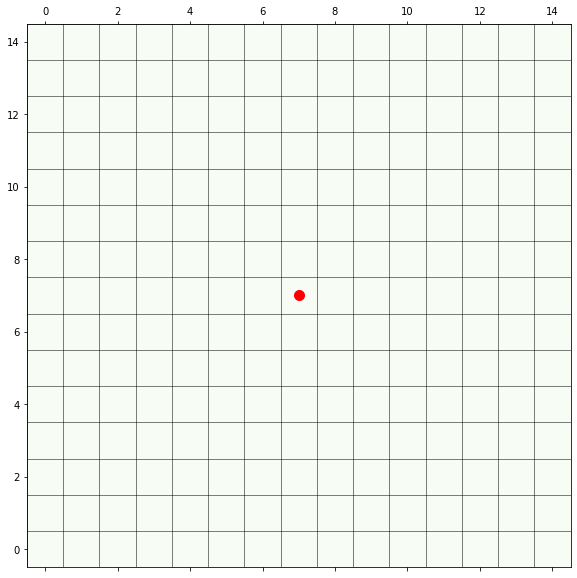

In [219]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(bg, cmap="Greens")
ax = draw_grid(ax, sz)
ax.scatter([7],[7], c="red", s=100)
fig.savefig("walk1.png", transparent=True)

In [195]:
bg = np.zeros((sz+1,sz+1))
bg[[6,8], [7,7]] = 1
bg[[7,7], [6,8]] = 1


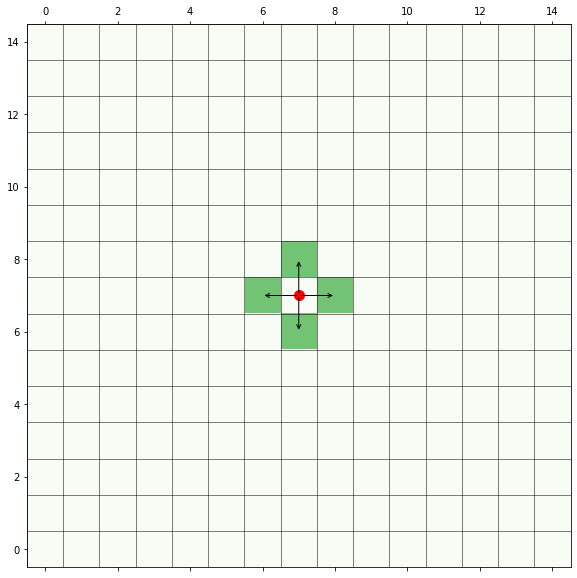

In [196]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(bg, cmap="Greens", vmax=2)
ax = draw_grid(ax, sz)
ax.scatter([7],[7], c="red", s=100)
for i,j in zip([1,0,-1,0], [0,1,0,-1]):
    ax.annotate("", xy=(7+i, 7+j), xytext=(7, 7),       arrowprops=dict(arrowstyle="->"))
fig.savefig("walk2.png", transparent=True)

In [197]:
bg = np.zeros((sz+1,sz+1))
bg[[6,8], [7,7]] = 0.5
bg[[7,7], [6,8]] = 0.5
bg[[7 ], [8]] = 1

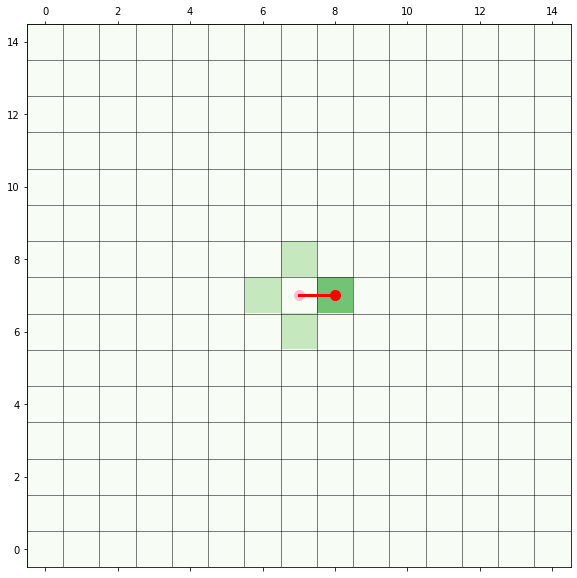

In [198]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(bg, cmap="Greens", vmax=2)
ax = draw_grid(ax, sz)
ax.scatter([7],[7], c="pink", s=100)
ax.scatter([8],[7], c="red", s=100)
ax.plot([7, 8],[7,7], c="red", lw=3)
fig.savefig("walk3.png", transparent=True)

In [199]:
bg = np.zeros((sz+1,sz+1))
bg[[6,8], [8,8]] = 1
bg[[7,7], [7,9]] = 1


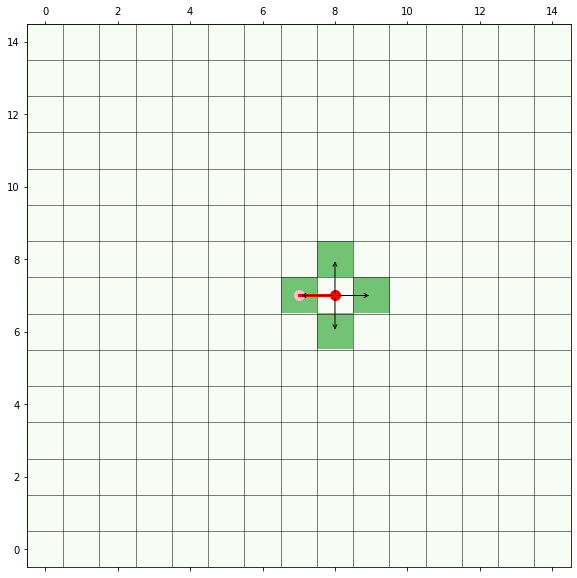

In [201]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(bg, cmap="Greens", vmax=2)
ax = draw_grid(ax, sz)
ax.scatter([7],[7], c="pink", s=100)
ax.scatter([8],[7], c="red", s=100)
ax.plot([7, 8],[7,7], c="red", lw=3)
for i,j in zip([1,0,-1,0], [0,1,0,-1]):
    ax.annotate("", xy=(8+i, 7+j), xytext=(8,7),       arrowprops=dict(arrowstyle="->"))
fig.savefig("walk4.png", transparent=True)

In [202]:
np.random.seed(42)
bg = np.zeros((sz+1,sz+1))
i = np.random.randint(-1,2, size=(50))
j = np.random.randint(-1,2, size=(50))
j[i!=0] = 0
i[j!=0] = 0
i[0]=0
j[0]=0
#i[i==0] = -1
#j[i==j]=-1
#j[i==j]=1
#i==j
i+7,j

(array([7, 6, 8, 8, 6, 6, 8, 7, 8, 8, 8, 8, 6, 8, 7, 6, 7, 7, 7, 7, 6, 6,
        7, 7, 6, 6, 6, 8, 8, 8, 7, 8, 7, 7, 8, 7, 8, 8, 6, 8, 6, 8, 8, 6,
        6, 8, 7, 6, 7, 7]),
 array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0, -1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1]))

In [203]:
i.cumsum()+7

array([ 7,  6,  7,  8,  7,  6,  7,  7,  8,  9, 10, 11, 10, 11, 11, 10, 10,
       10, 10, 10,  9,  8,  8,  8,  7,  6,  5,  6,  7,  8,  8,  9,  9,  9,
       10, 10, 11, 12, 11, 12, 11, 12, 13, 12, 11, 12, 12, 11, 11, 11])

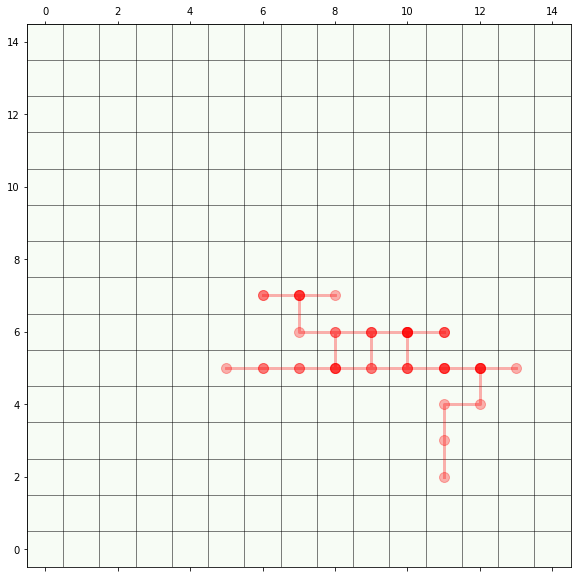

In [204]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(bg, cmap="Greens", vmax=2)
ax = draw_grid(ax, sz)
ax.scatter([i.cumsum()+7],[j.cumsum()+7], c="red", alpha=0.3, s=100)
#ax.scatter([8],[7], c="red", s=100)
ax.plot(i.cumsum()+7,j.cumsum()+7, c="red", alpha=0.3, lw=3)
fig.savefig("walk5.png", transparent=True)

In [209]:
def next_step_probability(current_i, current_j, sigma_i, sigma_j, size):
    grid_ii, grid_jj = np.mgrid[0:size, 0:size]
    rad = (
        (((grid_ii - current_i) ** 2) / (sigma_i ** 2))
        + (((grid_jj - current_j) ** 2)/ (sigma_j ** 2))
    )

    p_next_step = np.exp(-(rad / 2.0)) / (2.0 * np.pi * sigma_i * sigma_j)
    return p_next_step / p_next_step.sum()


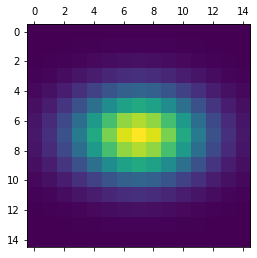

In [214]:
bg = next_step_probability(7, 7, 2, 3, sz+1)
plt.matshow(bg)

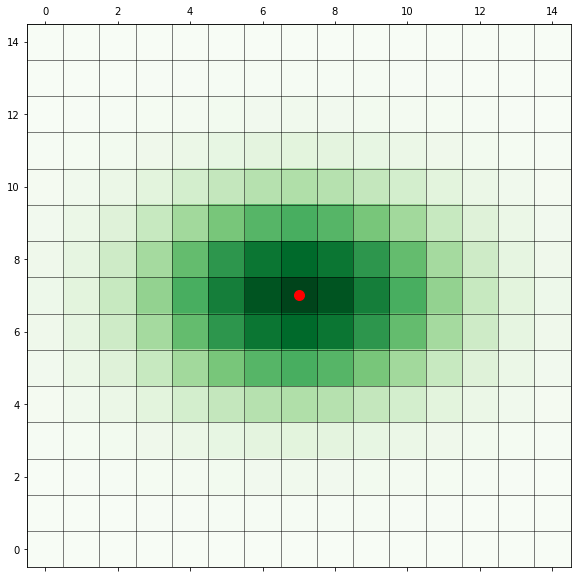

In [216]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(bg, cmap="Greens")
ax = draw_grid(ax, sz)
ax.scatter([7],[7], c="red", s=100)
fig.savefig("walk6.png", transparent=True)

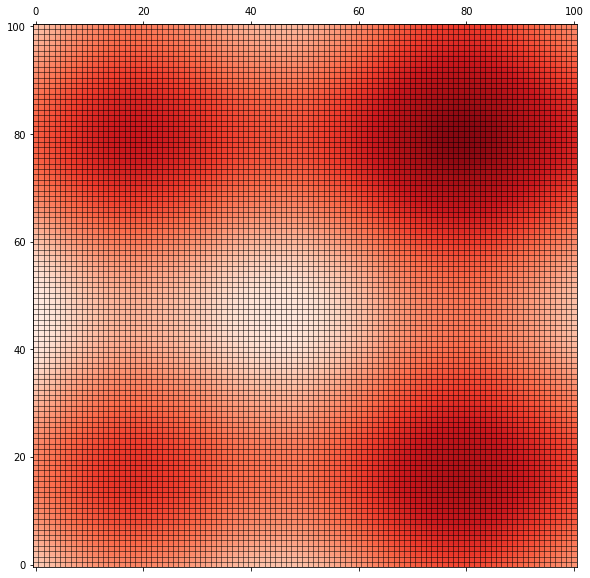

In [227]:
grid_ii, grid_jj = np.mgrid[0:200, 0:200]
my_i = np.sin(grid_ii/130) + np.sin(grid_ii/10)
my_i /= my_i.max()
my_j = np.sin(grid_jj/100) + np.sin(grid_jj/50)+ np.sin(grid_jj/10)
my_j /= my_j.max()
#grid_jj

fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(my_j+my_i, cmap="Reds")
ax = draw_grid(ax, 100)
#ax.scatter([7],[7], c="red", s=100)
fig.savefig("walk7.png", transparent=True)



# Simulating some data

In [2]:
parameters = {"sigma_i" : 2,
              "sigma_j" : 3}

## in a maze

In [3]:
initial_act = np.ones((200, 200))
initial_act[50:100, 50:60] = 0
initial_act[20:89, 80:90] = 0
initial_act[90:120, 0:10] = 0
initial_act[120:200, 30:40] = 0
initial_act[180:190, 50:60] = 0

initial_act[50:60, 50:200] = 0
initial_act[179:189, 80:130] = 0
initial_act[110:120, 0:190] = 0
initial_act[120:200, 30:40] = 0
initial_act[180:190, 50:60] = 0

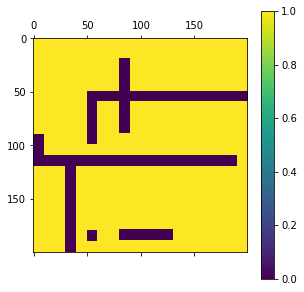

In [4]:
plt.matshow(initial_act)
plt.colorbar()

In [5]:
rw = random_walk_model(parameters, seed=42)

In [6]:
rw.set_activation_map(initial_act)

In [9]:
TIME=2000
for t in range(TIME):
  rw.evolve_step()

(0.0, 200.0)

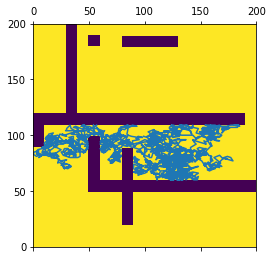

In [11]:
plt.matshow(initial_act)
plt.plot(rw.trajectory[:TIME,1], rw.trajectory[:TIME,0])
plt.xlim(0,200)
plt.ylim(0,200)

## in a mountain area

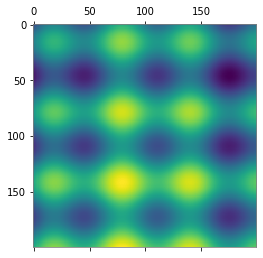

In [56]:
grid_ii, grid_jj = np.mgrid[0:200, 0:200]
my_i = np.sin(grid_ii/130) + np.sin(grid_ii/10)
my_i /= my_i.max()
my_j = np.sin(grid_jj/100) + np.sin(grid_jj/50)+ np.sin(grid_jj/10)
my_j /= my_j.max()
#grid_jj
plt.matshow(my_j+my_i)

In [68]:
rw = random_walk_model(parameters, seed=45)
rw.set_activation_map(my_j+my_i)

In [69]:
TIME=2000
for t in range(TIME):
  rw.evolve_step()

(0.0, 200.0)

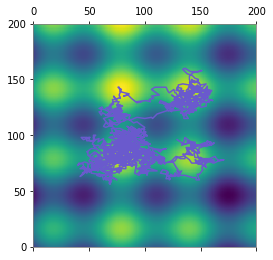

In [70]:
plt.matshow(rw.activation_map)
plt.plot(rw.trajectory[:TIME,1], rw.trajectory[:TIME,0])
plt.xlim(0,200)
plt.ylim(0,200)

# Evaluating some data

The parameters should still be recoverable even with background "noise"

In [71]:
rw_eval = random_walk_model(parameters)

In [72]:
TIME=2000
lik = 0
for t in range(TIME):
  lik += rw_eval.evolve_step(sim=False, dat=rw.trajectory[t,:])
lik
  

-9306.592515719194

In [73]:
class gridsearch_dat():
  def __init__(self, ps, actual, grid):
    self.name = ps
    self.actual = actual
    self.grid = grid
    self.res = None

In [74]:
sigma_i = gridsearch_dat("sigma_i", 2, [1.4,1.6,1.8,2, 2.2, 2.4])
sigma_j = gridsearch_dat("sigma_j", 3, [2.4,2.6,2.8,3, 3.2, 3.4])
gs_list = [sigma_i, sigma_j]

In [75]:
#just to be safe
pdict = parameters.copy()

In [76]:
sim_dat = rw.trajectory[:TIME,:]

In [77]:
sim_dat = np.expand_dims(sim_dat, axis=0)

In [78]:
for p in gs_list:
    res = rec.grid_search(p.grid, p.name, sim_dat, pdict)
    p.res = res

In [79]:
def plot_gs(P):
  fig, ax = plt.subplots(figsize= (35,10))
  for tr in range(3):
      ax.axvline(P.actual, c="red", lw=5)
      ax.plot(P.grid, P.res, ".-", c="black")
      fpname = P.name
      ax.set_title(f"{fpname}", fontsize=35)
      ax.set_xlabel(f"Parameter Value", fontsize=20, color="grey")
      ax.set_ylabel(f"Likelihood", fontsize=20, color="grey")
      ax.tick_params(axis='both', labelsize=20,labelcolor="grey", color="grey")
      ax.annotate(f"actual={P.actual}", (P.actual, np.median(P.res)), size=30, color="red")
  return fig, ax

mpl.rcParams["axes.prop_cycle"]=mpl.cycler(color=["slateblue","rebeccapurple","orchid"])
mpl.rc('axes',edgecolor='grey')

sigma_i
sigma_j


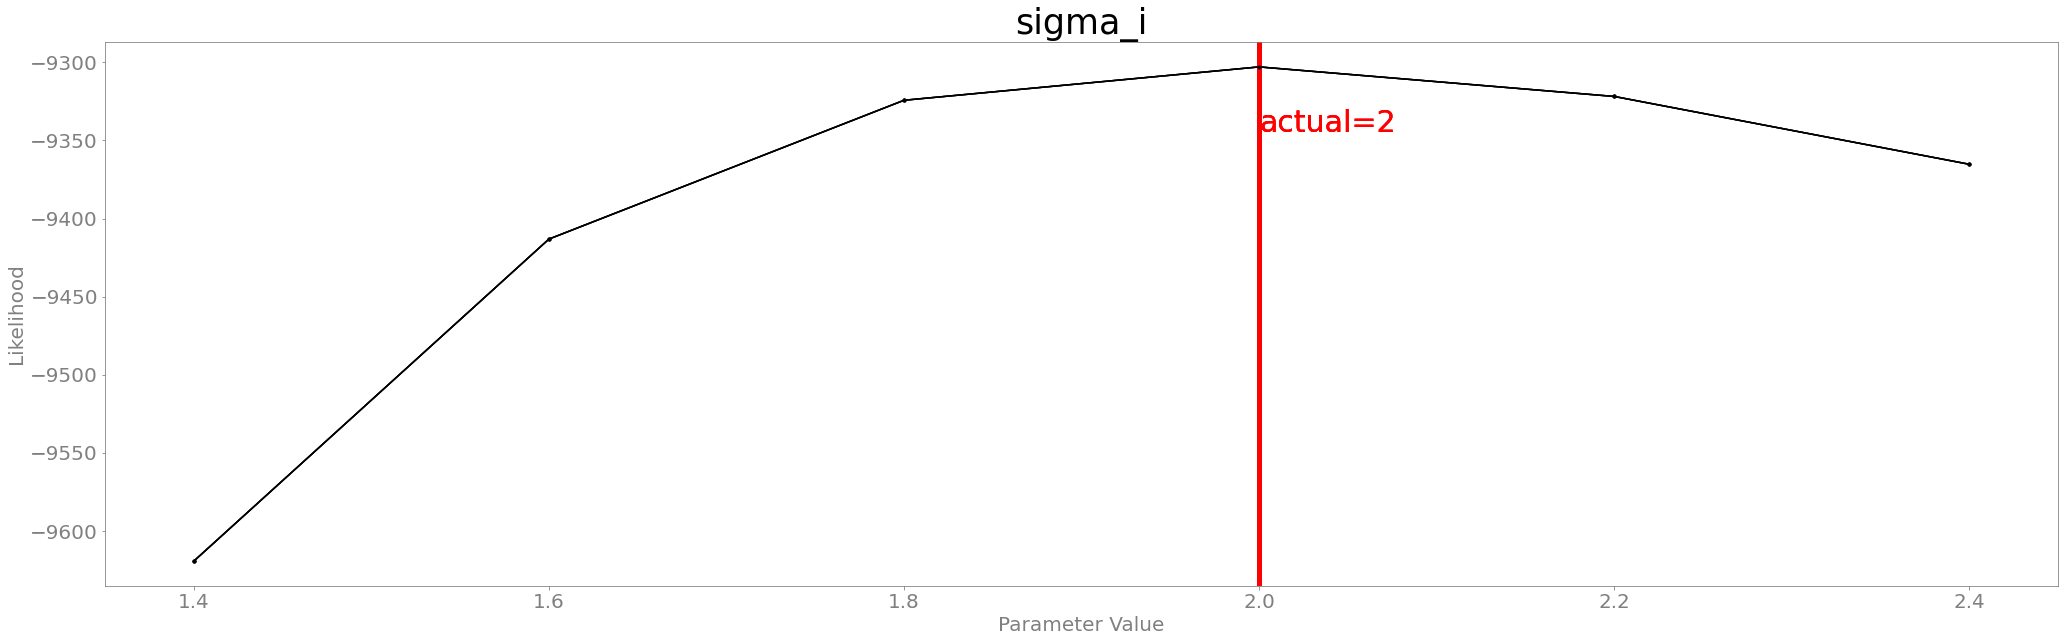

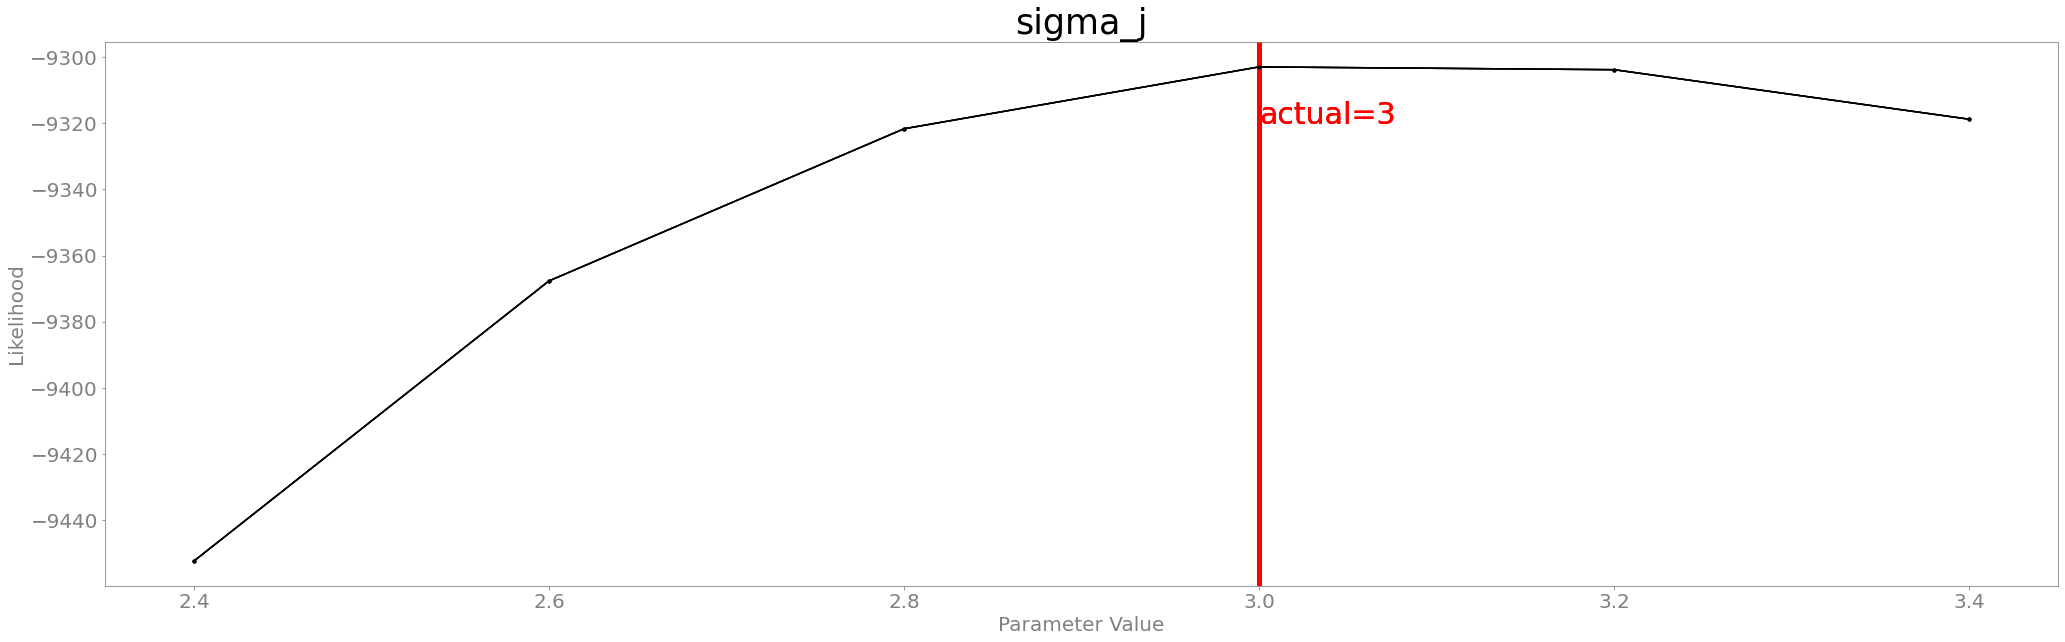

In [80]:
with PdfPages('param_rec2.pdf') as pdf:
    for P in gs_list:
        print(P.name)
        fig, ax = plot_gs(P)
        pdf.savefig(fig)